<a href="https://colab.research.google.com/github/its-asif/ML-testing/blob/main/13_a_small_project/small_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd

In [77]:
df = pd.read_csv("/content/sample_data/placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [78]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [80]:
import matplotlib.pyplot as plt

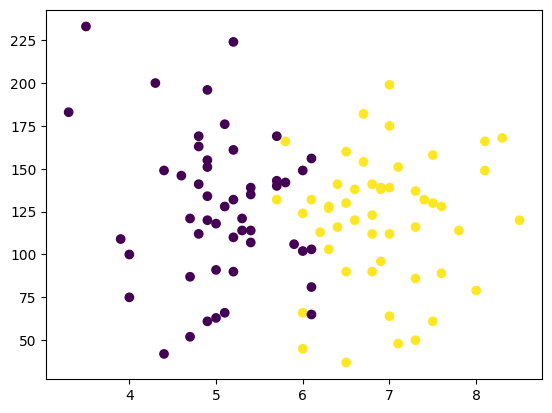

In [81]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

### train test split
X -> input / independent var

y -> output / dependent var

In [82]:
X = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [85]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [86]:
# Using logistic regression classifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [87]:
# train model
clf.fit(X_train, y_train);

In [88]:
y_predict = clf.predict(X_test)
y_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [89]:
y_test

,placement
95,0
14,0
99,1
53,1
51,0
68,0
23,0
17,0
21,1
78,0


In [90]:
# compare
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test, y_predict)

0.8

In [98]:
# decision boundary
from mlxtend.plotting import plot_decision_regions

<Axes: >

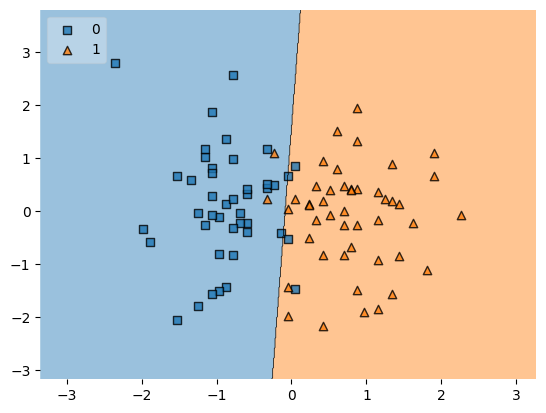

In [99]:
plot_decision_regions(X_train, y_train.values, clf = clf, legend=2)